In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [38]:
start = '2014-01-01'
end = '2023-12-31'
stock = 'AAPL'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [39]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273228,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893814,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985933,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864452,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971251,258529600
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [40]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273228,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893814,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985933,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864452,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971251,258529600
...,...,...,...,...,...,...,...
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2513,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900


In [41]:
ma_50_days = data.Close.rolling(50).mean()
ma_100_days = data.Close.rolling(100).mean()
ma_200_days = data.Close.rolling(200).mean()

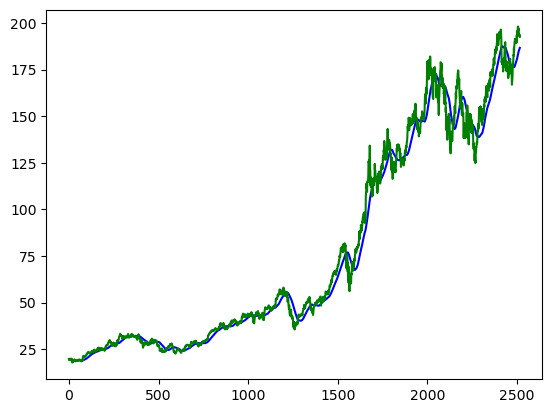

In [42]:
plt.plot(ma_50_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

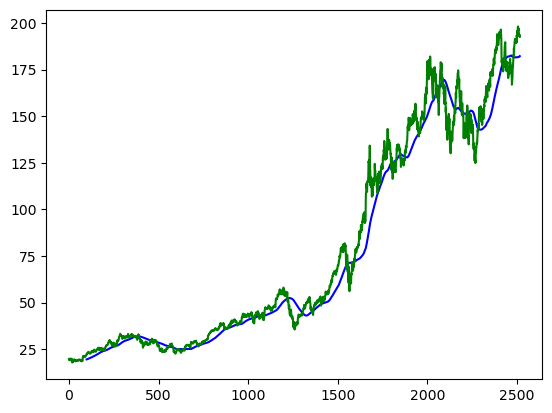

In [43]:
plt.plot(ma_100_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

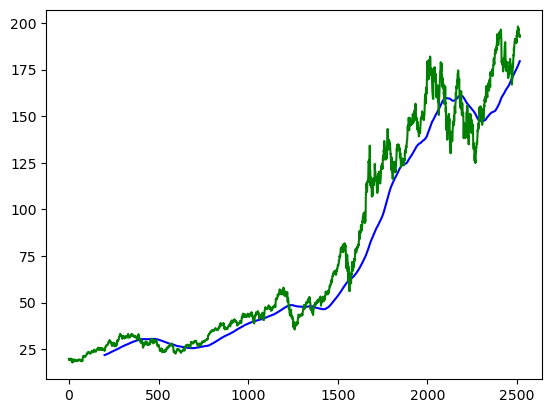

In [44]:
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

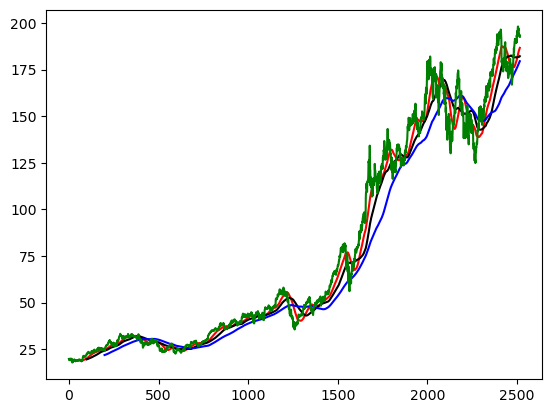

In [45]:
plt.plot(ma_50_days, 'red')
plt.plot(ma_100_days, 'black')
plt.plot(ma_200_days, 'blue')
plt.plot(data.Close, 'green')
plt.show()

In [46]:
df = pd.DataFrame(data)

In [47]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273228,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893814,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985933,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864452,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971251,258529600


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.7 KB


In [49]:
len(df)

2516

In [63]:
df_train = pd.DataFrame(df.Close[0: int(len(df)*0.8)])
df_test = pd.DataFrame(df.Close[int(len(df)*0.8): len(df)])

In [64]:
df_test.shape

(504, 1)

In [69]:
df_train.shape

(2012, 1)

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [68]:
df_train_scale = scaler.fit_transform(df_train)
df_test_scale = scaler.transform(df_test)

In [82]:
df_train_scale[70]

array([0.00481377])

In [71]:
x = []
y = []

for i in range(100, df_train_scale.shape[0]):
    x.append(df_train_scale[i-100:i])
    y.append(df_train_scale[i,0])

In [83]:
x[70]

array([[0.00481377],
       [0.00399608],
       [0.00422688],
       [0.00553032],
       [0.00689973],
       [0.00701623],
       [0.00548857],
       [0.01494464],
       [0.01586123],
       [0.02072994],
       [0.02034307],
       [0.01985071],
       [0.02015625],
       [0.02039802],
       [0.02224   ],
       [0.02080028],
       [0.02034307],
       [0.01938912],
       [0.0188506 ],
       [0.02045298],
       [0.02065739],
       [0.02068158],
       [0.01957156],
       [0.02148168],
       [0.02303791],
       [0.02306428],
       [0.02341597],
       [0.02362698],
       [0.02513485],
       [0.02766263],
       [0.02730654],
       [0.02980574],
       [0.0292826 ],
       [0.02832644],
       [0.03028052],
       [0.03188071],
       [0.03243682],
       [0.03204556],
       [0.03431616],
       [0.03516242],
       [0.03456235],
       [0.03214668],
       [0.03059264],
       [0.03200819],
       [0.03182356],
       [0.03197743],
       [0.03148506],
       [0.030

In [84]:
x, y = np.array(x), np.array(y)

In [85]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [86]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\dhruv\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [88]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - loss: 0.0441
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0051
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 0.0043
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 0.0037
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0041
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0031
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - loss: 0.0034
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0036
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - loss: 0.0028
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - loss: 0.0030
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - loss: 0.0025
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - loss: 0.0033
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0026
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0029
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step

In [89]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [90]:
past_100 = df_train.tail(100)

In [119]:
data_test = pd.concat([past_100, df_test], ignore_index=True)

In [120]:
data_test_scale  =  scaler.fit_transform(data_test)

In [121]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [122]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [126]:
inverted_X = scaler.inverse_transform(df_test_scale)

In [127]:
scale =1/scaler.scale_

In [128]:
y_predict = y_predict*scale

In [129]:
y = y*scale

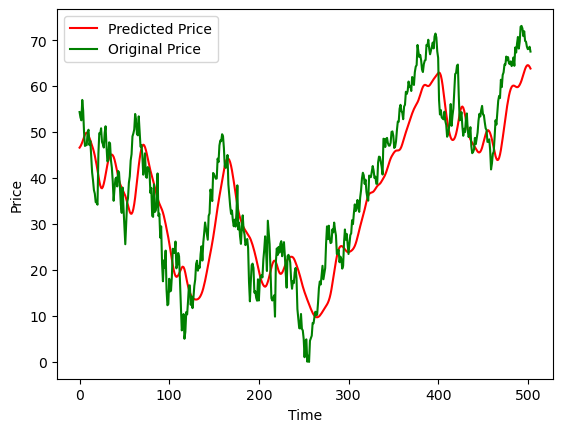

In [134]:
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [135]:
model.save('Stock Predictions Model.keras')